# LCG算法

线性同余法

$$
X_{n+1} = (a X_n + b) \mod c
$$

当下一次随机的时候，就将上次的结果作为新的种子进行计算。

- 如果要增加随机性，我们还可以在输出结果上做一些优化
  - 进行位移
  - 调换二进制位的顺序
  - ...

缺点：计算方式是固定的，只是随机种子未知。


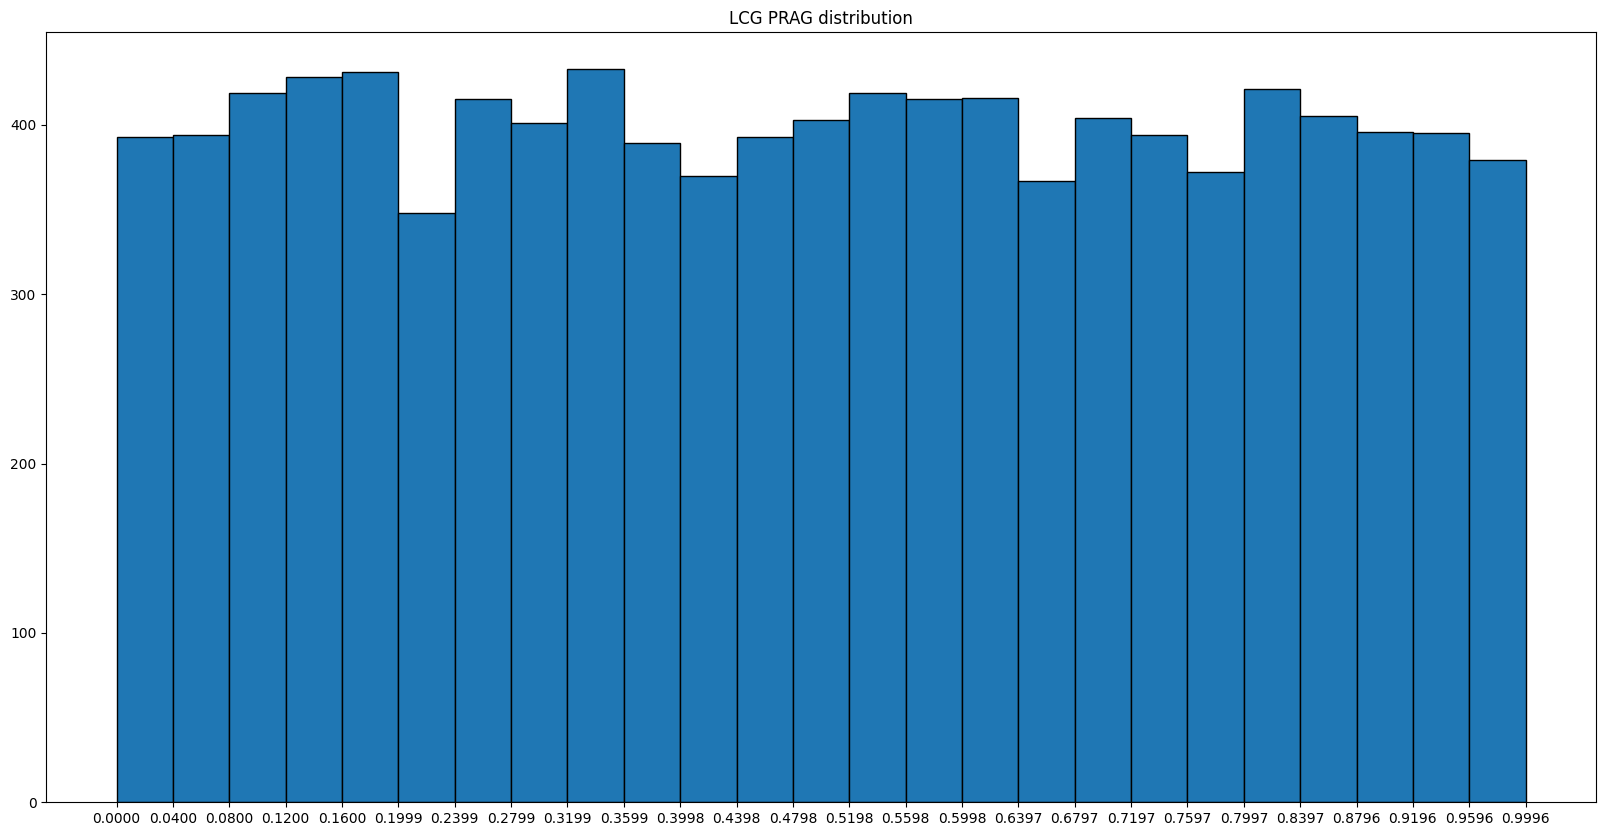

In [5]:
# RNG Algorithm
import matplotlib.pyplot as plt
import numpy as np


# seed = 2  # init: we can chage the initial seed to control the PRNG
def lcg():
    global seed                                         # 全局变量，可以利用上一次计算结果 递推
    seed = (25214903917 * seed + 11) & ((1 << 48) - 1)  # 取模运算 可以用 按位与 代替
    return seed


xdata = [lcg() / ((1 << 48)) for i in range(10000)]


plt.figure(figsize=(20, 10))
nums, bins, patches = plt.hist(xdata, bins=25, edgecolor='k')
plt.xticks(bins)
plt.title("LCG PRAG distribution")

plt.show()


In [ ]:
# 2D Random Walk (vpython edition)
from vpython import *
from IPython.display import IFrame
import numpy as np
import random


scene = canvas(title="Walk 2D")
scene.width = 500
scene.height = 500
scene.range = 50


walk = curve(color=color.yellow, radius=0.1)
jmax = 10000
x = 0
y = 0
for i in range(0, jmax):
    # x += 2.0 * random.random() - 1
    # y += 2.0 * random.random() - 1
    x += 2.0*lcg()/(1 << 48) - 1
    y += 2.0*lcg()/(1 << 48) - 1
    walk.append(pos=(x, y, 0))


xaxs = curve(pos=[vector(0, 0, 0), vector(0, 30, 0)], radius=0.2)
yaxs = curve(pos=[vector(0, 0, 0), vector(30, 0, 0)], radius=0.2)
xlb = label(x=45, y=3, text="x", height=20)
ylb = label(x=10, y=30, text="y", height=20)
R = np.sqrt(x*x+y*y)
rlb = label(pos=vector(-30, 25, 0), height=20)
message = "Distance from origin: "
message += "%.2f" % R
rlb.text = message


In [ ]:
from scipy import optimize


def linear_function(x, A, B):
    return A * x + B


N = 1000

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('random.random() vs. lcg()')


# fig1: lcg()
ax1.set_title("random.random()")
ax1.set_xlabel("$\sqrt{N}$")
ax1.set_ylabel("$R_{rms}$")

# x = 0
# y = 0
Rrms2 = 0
sqrtN = []
Rrms = []
for i in range(1, N+1):
    dx = 2.0*random.random() - 1
    dy = 2.0*random.random() - 1
    # x += dx
    # y += dy
    Rrms2 += dx*dx + dy*dy
    sqrtN.append(np.sqrt(i))
    Rrms.append(np.sqrt(Rrms2))

ax1.scatter(sqrtN, Rrms, s=1)

A1, B1 = optimize.curve_fit(linear_function, sqrtN, Rrms)[0]
opt_y1 = [linear_function(x, A1, B1) for x in sqrtN]
ax1.plot(sqrtN, opt_y1, "orange", label="$r_{rms}$ = %.2f" % A1)
ax1.legend(loc="best")

# fig2: lcg()
ax2.set_title("lcg()")
ax2.set_xlabel("$\sqrt{N}$")
ax2.set_ylabel("$R_{rms}$")

x = 0
y = 0
Rrms2 = 0
sqrtN = []
Rrms = []
for i in range(1, N+1):
    dx = 2.0*lcg()/(1 << 48) - 1
    dy = 2.0*lcg()/(1 << 48) - 1
    x += dx
    y += dy
    Rrms2 += dx*dx + dy*dy
    sqrtN.append(np.sqrt(i))
    Rrms.append(np.sqrt(Rrms2))

ax2.scatter(sqrtN, Rrms, s=1)

A2, B2 = optimize.curve_fit(linear_function, sqrtN, Rrms)[0]
opt_y2 = [linear_function(x, A2, B2) for x in sqrtN]
ax2.plot(sqrtN, opt_y2, "orange", label="$r_{rms}$ = %.2f" % A2)
ax2.legend(loc="best")

plt.tight_layout()
plt.show()


In [ ]:
# self-avoiding walk
import random
import matplotlib.pyplot as plt


X = [0]
Y = [0]


def isUpEmpty(current_i):
    for j in range(0, current_i):
        if (X[j] == X[current_i] and Y[j] == Y[current_i] + 1):
            return 0
    return 1


def isDownEmpty(current_i):
    for j in range(0, current_i):
        if (X[j] == X[current_i] and Y[j] == Y[current_i] - 1):
            return 0
    return 1


def isLeftEmpty(current_i):
    for j in range(0, current_i):
        if (X[j] == X[current_i] - 1 and Y[j] == Y[current_i]):
            return 0
    return 1


def isRightEmpty(current_i):
    for j in range(0, current_i):
        if (X[j] == X[current_i] + 1 and Y[j] == Y[current_i]):
            return 0
    return 1


def SAW():
    i = 0
    while True:
        if isUpEmpty(i) or isDownEmpty(i) or isLeftEmpty(i) or isRightEmpty(i):
            temp_x = X[-1]
            temp_y = Y[-1]
            while (temp_x == X[-1] and temp_y == Y[-1]):
                # random walk
                # direction = random.random()
                direction = lcg()/(1 << 48)
                if (direction < 0.25):
                    if isUpEmpty(i):
                        # go up
                        temp_y = Y[-1] + 1
                    else:
                        continue
                elif(direction < 0.5):
                    if isDownEmpty(i):
                        # down
                        temp_y = Y[-1] - 1
                    else:
                        continue
                elif(direction < 0.75):
                    if isLeftEmpty(i):
                        # left
                        temp_x = X[-1] - 1
                    else:
                        continue
                else:
                    if isRightEmpty(i):
                        # right
                        temp_x = X[-1] + 1
                    else:
                        continue
            X.append(temp_x)
            Y.append(temp_y)
            i += 1
        else:
            return i


expected_value = 500
step = SAW()
while (step < expected_value):
    i = 0
    X = [0]
    Y = [0]
    step = SAW()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("2D random walk")
plt.xlabel("x")
plt.ylabel("y")
ax.set_aspect('equal')
plt.plot(X, Y, "b-", label='step = %d' % step)
plt.scatter(X, Y, s=10, label='end point = [%d, %d]' % (X[-1], Y[-1]))
plt.legend(loc='best')
plt.show()

print(step)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = plt.plot([], [], "b-", animated=True)
x = []
y = []


def init():
    plt.title("2D random walk")
    plt.xlabel("x")
    plt.ylabel("y")
    ax.set_aspect('equal')
    ax.set_xlim(min(X)-2, max(X)+2)
    ax.set_ylim(min(Y)-2, max(Y)+2)
    return line,


def update(frame):
    x.append(X[frame])
    y.append(Y[frame])
    line.set_data(x, y)
    return line,


ani = FuncAnimation(fig, update, frames=len(X), interval=10, init_func=init, blit=True)
ani.save("animation.gif", fps=12, writer="pillow")
